In [3]:
#Desafio prático
#✅ Objetivo:
#Responder às seguintes perguntas com base no dataset:
#Qual máquina apresenta maior eficiência média?
#Existe correlação entre aumento de temperatura e defeitos?
#Qual turno apresenta maior variabilidade de produção?
#Como a umidade parece afetar a eficiência?
#Você pode trabalhar diretamente no Jupyter Notebook ou no VS Code com terminal Python.
#Se quiser, posso gerar um notebook .ipynb com tudo isso comentado e com espaços para respostas.
#📌 Deseja que eu gere esse notebook com os comandos, gráficos e espaços para suas análises? ​

In [4]:
import pandas as pd

df = pd.read_csv("D:/Projetos/projetos-em-ia-e-analise/dados/dados_producao.csv")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   data               100 non-null    object 
 1   turno              100 non-null    object 
 2   maquina_id         100 non-null    object 
 3   pecas_produzidas   100 non-null    int64  
 4   pecas_defeituosas  100 non-null    int64  
 5   temperatura        100 non-null    float64
 6   umidade            100 non-null    float64
 7   eficiencia_%       100 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 6.4+ KB


In [5]:
df.describe()

,pecas_produzidas,pecas_defeituosas,temperatura,umidade,eficiencia_%
count,100.00000,100.000000,100.000000,100.000000,100.000000
mean,354.91000,26.810000,75.301000,45.903000,92.016459
std,74.66465,13.610524,4.910132,9.307762,4.899023
min,201.00000,0.000000,58.800000,23.800000,76.616915
25%,311.00000,18.750000,71.850000,39.000000,89.302158
50%,348.50000,27.500000,75.400000,45.600000,92.496811
75%,409.50000,36.500000,78.750000,51.600000,95.512213
max,497.00000,49.000000,85.700000,66.900000,100.000000


In [6]:
df.head()

,data,turno,maquina_id,pecas_produzidas,pecas_defeituosas,temperatura,umidade,eficiencia_%
0,2023-01-01,Noite,M3,379,7,71.4,51.2,98.153034
1,2023-01-02,Manhã,M3,312,26,78.4,51.3,91.666667
2,2023-01-03,Noite,M3,251,26,71.3,44.9,89.641434
3,2023-01-04,Noite,M1,467,33,76.1,36.0,92.933619
4,2023-01-05,Manhã,M3,494,20,75.2,45.8,95.951417


In [7]:
df.isnull()

,data,turno,maquina_id,pecas_produzidas,pecas_defeituosas,temperatura,umidade,eficiencia_%
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.groupby("turno")['eficiencia_%'].mean()

turno
Manhã    91.732827
Noite    92.235798
Tarde    92.087579
Name: eficiencia_%, dtype: float64

In [10]:
df.groupby("pecas_defeituosas")["umidade"].sum()


pecas_defeituosas
0      45.5
1     118.5
2      86.2
3      47.4
4      49.1
5      90.6
6      57.4
7     143.6
8      63.8
11     46.2
12     43.9
13     43.6
14    106.8
15     34.3
16     77.7
17     47.2
18     36.8
19     45.1
20    106.1
21    209.8
22    203.5
23    157.9
24    119.2
25    103.0
26    132.8
27    107.8
28    122.7
29     69.1
30     85.5
31    129.5
32    282.5
33     65.7
34    200.7
35     29.1
36    102.1
38     36.0
39     96.5
40     53.6
41    179.4
42    106.0
43     47.3
44     39.0
45    195.7
46     90.4
47     78.6
48    150.3
49    106.8
Name: umidade, dtype: float64

In [11]:
df[["temperatura", "eficiencia_%", "umidade"]].corr()

,temperatura,eficiencia_%,umidade
temperatura,1.000000,0.167139,0.063461
eficiencia_%,0.167139,1.000000,-0.017796
umidade,0.063461,-0.017796,1.000000


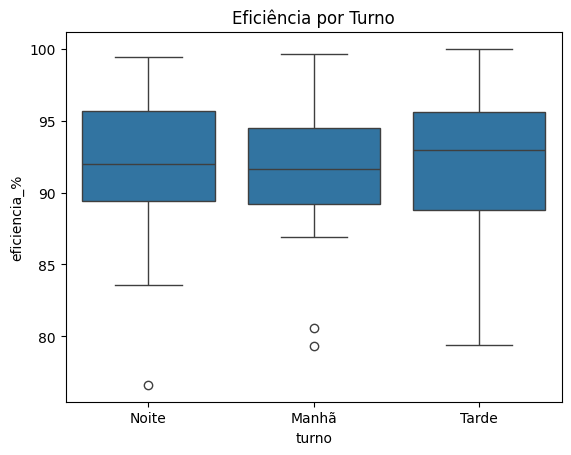

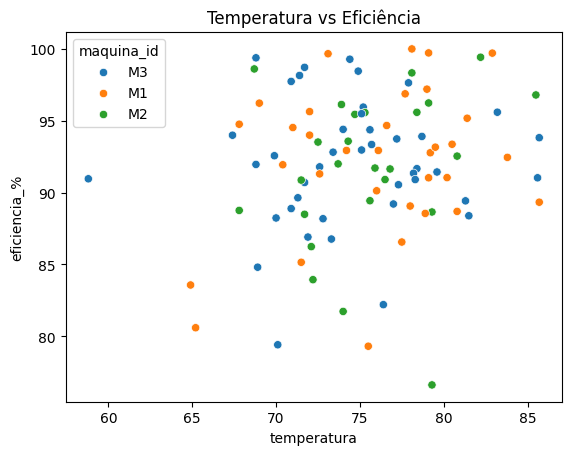

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="turno", y="eficiencia_%", data=df)
plt.title("Eficiência por Turno")
plt.show()

sns.scatterplot(x="temperatura", y="eficiencia_%", data=df, hue="maquina_id")
plt.title("Temperatura vs Eficiência")
plt.show()



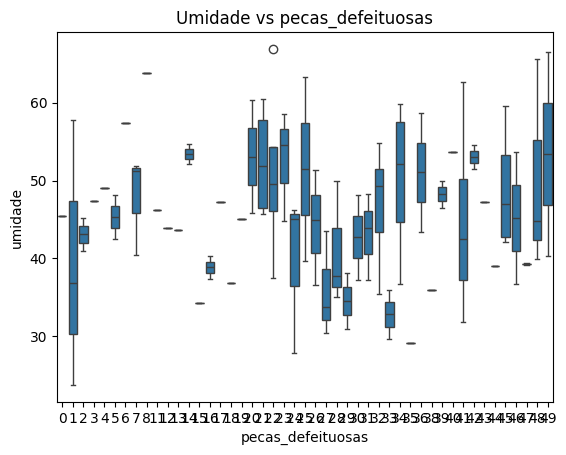

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="pecas_defeituosas", y="umidade", data=df)
plt.title("Umidade vs pecas_defeituosas")
plt.show()


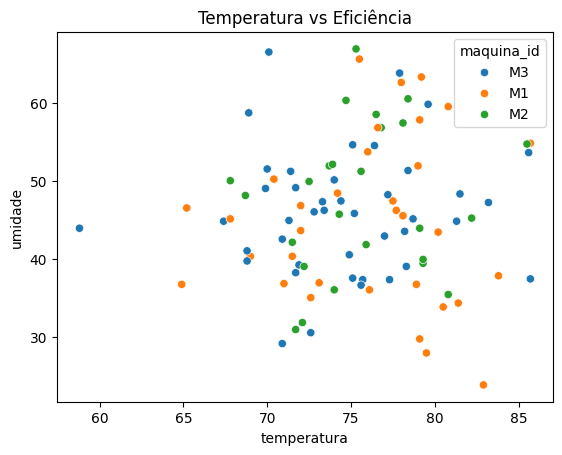

In [14]:
sns.scatterplot(x="temperatura", y="umidade", data=df, hue="maquina_id")
plt.title("Temperatura vs Eficiência")
plt.show()

In [15]:
df[["temperatura", "umidade", "pecas_defeituosas"]].corr()


,temperatura,umidade,pecas_defeituosas
temperatura,1.000000,0.063461,-0.090398
umidade,0.063461,1.000000,0.013807
pecas_defeituosas,-0.090398,0.013807,1.000000


In [16]:
df.groupby("maquina_id")["pecas_defeituosas"].sum()

maquina_id
M1     861
M2     694
M3    1126
Name: pecas_defeituosas, dtype: int64

In [17]:
#Verifica a estabilidade da eficiência com o desvio padrão por máquina:
df.groupby("maquina_id")["eficiencia_%"].agg(["mean", "std"])   

,mean,std
maquina_id,,
M1,92.184317,5.143353
M2,91.711324,5.480458
M3,92.066198,4.431869


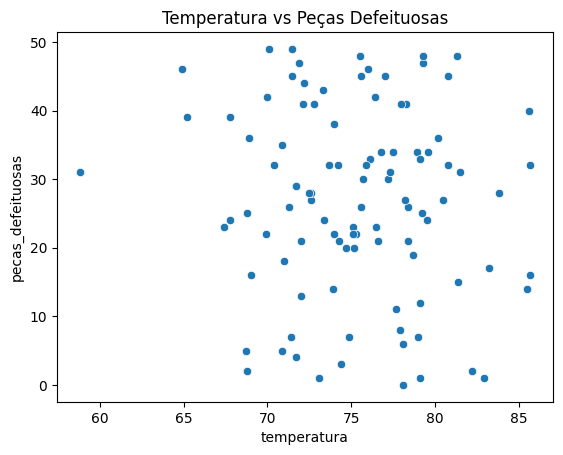

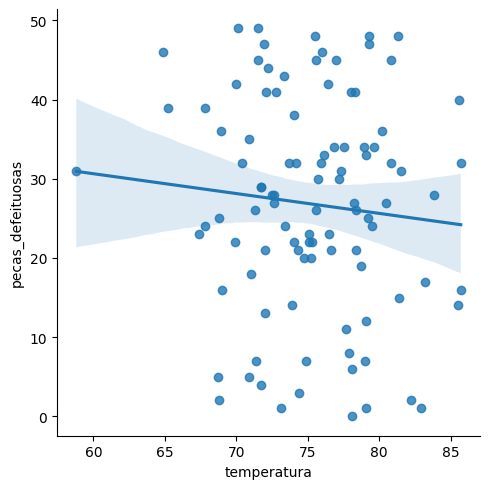

In [18]:
# Relação entre temperatura e peças defeituosas
sns.scatterplot(x="temperatura", y="pecas_defeituosas", data=df)
plt.title("Temperatura vs Peças Defeituosas")
plt.show()

# Adicionando linha de tendência
sns.lmplot(x="temperatura", y="pecas_defeituosas", data=df)

In [19]:
#Quantificar a variabilidade
df.groupby("turno")["pecas_produzidas"].agg(["mean", "std"])


,mean,std
turno,,
Manhã,360.424242,73.751284
Noite,350.258065,75.510250
Tarde,353.861111,76.547335


In [20]:
# Criando faixas de umidade
df["faixa_umidade"] = pd.cut(df["umidade"], bins=[0, 30, 45, 60, 100])

# Eficiência média por faixa de umidade
df.groupby("faixa_umidade")["eficiencia_%"].mean()


C:\Users\andre\AppData\Local\Temp\ipykernel_34392\3606722786.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("faixa_umidade")["eficiencia_%"].mean()


faixa_umidade
(0, 30]      93.198086
(30, 45]     91.349081
(45, 60]     92.769191
(60, 100]    90.601166
Name: eficiencia_%, dtype: float64